In [1]:
# start by reading the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus_Tsai.pkl')
data

,speech
President_Tsai,Friends from the domestic and international me...


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['speech'].apply(pol)
data['subjectivity'] = data['speech'].apply(sub)
data

,speech,polarity,subjectivity
President_Tsai,Friends from the domestic and international me...,0.167598,0.419575


In [5]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.speech:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Friends from the domestic and international media, thank you for your patience. To begin, I would like to thank everyone who voted today. Regardless of how you voted, by taking part in this election you have put democratic values into practice. With each presidential election, Taiwan is showing the world how much we cherish our free, democratic way of life, and how much we cherish our nation: the Republic of China (Taiwan). I would also like to offer my respect to Mayor Han and Chairman Soong for completing this democratic journey with me. I will take your constructive criticism with me into my next term. I am',
  ' confident that although our parties may have different views, we will have many opportunities to cooperate in the future. Today, the Taiwanese people voted to keep the Democratic Progressive Party in office and maintain our majority in the legislature. This result signifies that our administration and legislators have been moving in the right direction over the past four

In [8]:
# The list has 10 elements
len(list_pieces)

1

In [9]:
len(list_pieces[0])

10

In [11]:
# Calculate the polarity for each piece of text

polarity_speech = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_speech.append(polarity_piece)
    
polarity_speech

[[0.13333333333333333,
  0.1726190476190476,
  0.3346153846153846,
  0.1763888888888889,
  0.2285714285714286,
  0.045833333333333344,
  -0.08333333333333333,
  0.058712121212121215,
  0.23881673881673882,
  0.08680555555555554]]

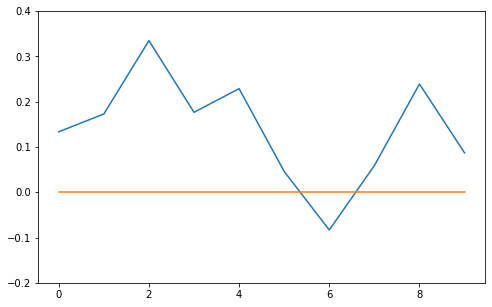

In [24]:
plt.rcParams['figure.figsize'] = [8, 5]

#plt.subplot(3, 4, index+1)
plt.plot(polarity_speech[0])
plt.plot(np.arange(0,10), np.zeros(10))
#plt.title(data['full_name'][index])
plt.ylim(ymin=-.2, ymax=.4)
    
plt.show()